In [1]:
# import packages to use
import matplotlib.pyplot as plt
import numpy as np
import glob
from scipy import stats
from scipy.optimize import curve_fit

# function definitions

In [2]:
# define some handy functions
def get_lineparams(x,y):
    """returns slope and y-intercept in linear and logarithmic space"""
    foo_log = stats.linregress(np.log(x),np.log(y))
    foo = stats.linregress(x,y)
    return foo.slope, foo.intercept, foo_log.slope, foo_log.intercept
def get_loglogline(x,m,y0,normalized=False):
    """get a line wich can be plotted in plt.loglog. m and y0 are slope and intercept of linear regression of logx and logy"""
    if normalized: return np.exp(np.log(x)*m+y0)/max(np.exp(np.log(x)*m+y0)),max(np.exp(np.log(x)*m+y0))
    else: return np.exp(np.log(x)*m+y0)

def myline(x,m,y0):
    """companion function of get_fclineparams for fitting the two params of a line to a given data"""
    return m*x+y0
def m2line(x,y0):
    """companion function of get_fclineparams for fitting the y-intercept param of a line with slope 2 to a given data"""
    return 2*x+y0
def m3line(x,y0):
    """companion function of get_fclineparams for fitting the y-intercept param of a line with slope 3 to a given data"""
    return 3*x+y0
def m12line(x,y0):
    """companion function of get_fclineparams for fitting the y-intercept param of a line with slope 12 to a given data"""
    return 12*x+y0

def get_fclineparams(X,Y,m=None):
    """function for fitting a line with data X,Y using scipy.optimize.fit_curve. m could be one of (None,2,3,4,12)
    which fixxes m to these values in the fitting. Returns an array of shape (1,4) containing slope and y-intercept in linear space
    in logarithmic space"""
    if m==None:
        linParams, linCov = curve_fit(myline, X, Y)
        logParams, logCov = curve_fit(myline, np.log(X), np.log(Y))
    elif m==2:
        linParams, linCov = curve_fit(m2line, X, Y)
        logParams, logCov = curve_fit(m2line, np.log(X), np.log(Y))
    elif m==3:
        linParams, linCov = curve_fit(m3line, X, Y)
        logParams, logCov = curve_fit(m3line, np.log(X), np.log(Y))
    elif m==12:
        linParams, linCov = curve_fit(m12line, X, Y)
        logParams, logCov = curve_fit(m12line, np.log(X), np.log(Y))
    return linParams,logParams

def cutoff(x,figures=2):
    """This function does a cutoff error at a given figures"""
    return int(x*10**figures)/10**figures

def get_mycmapping(cmp,size):
    """cmp should be a cmap"""
    return cmp(np.linspace(0,1,size+1))

def sign(num):
    """returns the sign of a number num"""
    return "-" if num < 0 else "+"

# T Vs m
This section holds content for producing a benchmark of the *time performance* versus the *number of multipoles*

## Load CBalls files

In [3]:
# load files containing time for each run of the code with different number of multipoles
time_f=glob.glob("/pscratch/sd/j/joar/makeBenchmark/varyingM/cballs_5_ftrvaryM*_T17zs9r0NS1024/time_T17zs9r0NS1024",recursive=True)
time_f.sort()
time_f

25


['/pscratch/sd/j/joar/makeBenchmark/varyingM/cballs_5_ftrvaryM002_T17zs9r0NS1024/time_T17zs9r0NS1024',
 '/pscratch/sd/j/joar/makeBenchmark/varyingM/cballs_5_ftrvaryM003_T17zs9r0NS1024/time_T17zs9r0NS1024',
 '/pscratch/sd/j/joar/makeBenchmark/varyingM/cballs_5_ftrvaryM004_T17zs9r0NS1024/time_T17zs9r0NS1024',
 '/pscratch/sd/j/joar/makeBenchmark/varyingM/cballs_5_ftrvaryM005_T17zs9r0NS1024/time_T17zs9r0NS1024',
 '/pscratch/sd/j/joar/makeBenchmark/varyingM/cballs_5_ftrvaryM006_T17zs9r0NS1024/time_T17zs9r0NS1024',
 '/pscratch/sd/j/joar/makeBenchmark/varyingM/cballs_5_ftrvaryM007_T17zs9r0NS1024/time_T17zs9r0NS1024',
 '/pscratch/sd/j/joar/makeBenchmark/varyingM/cballs_5_ftrvaryM008_T17zs9r0NS1024/time_T17zs9r0NS1024',
 '/pscratch/sd/j/joar/makeBenchmark/varyingM/cballs_5_ftrvaryM009_T17zs9r0NS1024/time_T17zs9r0NS1024',
 '/pscratch/sd/j/joar/makeBenchmark/varyingM/cballs_5_ftrvaryM010_T17zs9r0NS1024/time_T17zs9r0NS1024',
 '/pscratch/sd/j/joar/makeBenchmark/varyingM/cballs_5_ftrvaryM011_T17zs9r

In [7]:
# let's put the content of the files into an array
t_sec = np.zeros(len(time_f))
for i in range(len(time_f)):
    with open(time_f[i],"r") as f:
        line = f.readline()
        mins,sec = line.split()[2].split("elapsed")[0].split(":")
        t_sec[i] = float(mins)*60+float(sec)

In [5]:
# create an array with the number of multipoles in each run
multipoles = np.array([i for i in range(2,21)]+[50,100,200,300,400,500])

In [8]:
# get the slope and y-intercept of a line fitting t_sec
stts_m = get_lineparams(multipoles,t_sec)

## Load Treecorr files

In [12]:
# load files containing time for each run of the code with different number of multipoles
tc_files = glob.glob("/pscratch/sd/j/joar/makeBenchmark/tc5/varyingM/times/time*")
tc_files.sort()
print(len(tc_files))
print(*tc_files,sep="\n")

25
/pscratch/sd/j/joar/makeBenchmark/tc5/varyingM/times/time_m002_ns1024
/pscratch/sd/j/joar/makeBenchmark/tc5/varyingM/times/time_m003_ns1024
/pscratch/sd/j/joar/makeBenchmark/tc5/varyingM/times/time_m004_ns1024
/pscratch/sd/j/joar/makeBenchmark/tc5/varyingM/times/time_m005_ns1024
/pscratch/sd/j/joar/makeBenchmark/tc5/varyingM/times/time_m006_ns1024
/pscratch/sd/j/joar/makeBenchmark/tc5/varyingM/times/time_m007_ns1024
/pscratch/sd/j/joar/makeBenchmark/tc5/varyingM/times/time_m008_ns1024
/pscratch/sd/j/joar/makeBenchmark/tc5/varyingM/times/time_m009_ns1024
/pscratch/sd/j/joar/makeBenchmark/tc5/varyingM/times/time_m010_ns1024
/pscratch/sd/j/joar/makeBenchmark/tc5/varyingM/times/time_m011_ns1024
/pscratch/sd/j/joar/makeBenchmark/tc5/varyingM/times/time_m012_ns1024
/pscratch/sd/j/joar/makeBenchmark/tc5/varyingM/times/time_m013_ns1024
/pscratch/sd/j/joar/makeBenchmark/tc5/varyingM/times/time_m014_ns1024
/pscratch/sd/j/joar/makeBenchmark/tc5/varyingM/times/time_m015_ns1024
/pscratch/sd/j/jo

In [13]:
# let's put the content of the files into an array
t_tc_sec = np.zeros(len(tc_files))
for i in range(len(tc_files)):
    with open(tc_files[i],"r") as f:
        t_tc_sec[i] = f.readline().split(" ")[0]
multipoles_tc = np.array([i for i in range(2,21)]+[50,100,200,300,400,500])

In [14]:
stts_m_tc = get_lineparams(multipoles_tc,t_tc_sec)

## Do plots

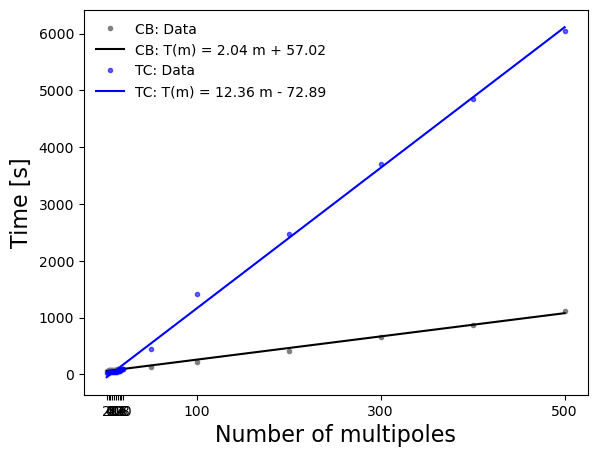

In [15]:
# do a plot in linear space showing the time it takes CBalls and Treecorr to calculate a number of multipoles
fls = 16
txts = 12
plt.figure(figsize=(6.5,5))
X = multipoles.astype("int")
X2 = multipoles_tc.astype("int")
Ydata = t_sec
Ydata2 = t_tc_sec
Y = stts_m[0]*multipoles + stts_m[1]
Y2 = stts_m_tc[0]*multipoles_tc + stts_m_tc[1]
plt.plot(X,Ydata,marker=".",linestyle="",color="grey",label=r"CB: Data")
plt.plot(X,Y,marker="",linestyle="solid",color="black",label=f"CB: T(m) = {cutoff(stts_m[0])} m {sign(stts_m[1])} {cutoff(abs(stts_m[1]))}")
plt.plot(X2,Ydata2,marker=".",linestyle="",color="blue",label=r"TC: Data",alpha=.6)
plt.plot(X2,Y2,marker="",linestyle="solid",color="blue",label=f"TC: T(m) = {cutoff(stts_m_tc[0])} m {sign(stts_m_tc[1])} {cutoff(abs(stts_m_tc[1]))}")

plt.xticks(X[::2],X[::2])
plt.xlabel("Number of multipoles",fontsize=fls)
plt.ylabel("Time [s]",fontsize=fls)

plt.legend(frameon=False)


# plt.savefig("images/cballsTC_tVsm_.pdf",bbox_inches="tight", dpi=200)
plt.show()

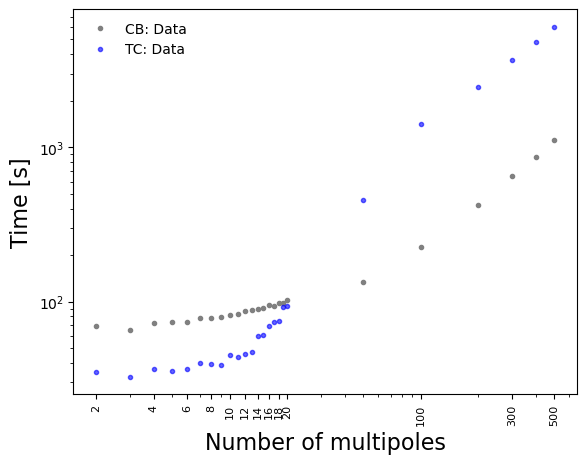

In [19]:
# do the same plot but only data points in loglog space
fls = 16
txts = 12
plt.figure(figsize=(6.5,5))


X = multipoles.astype("int")
X2 = multipoles_tc.astype("int")
Ydata = t_sec
Ydata2 = t_tc_sec
plt.plot(X,Ydata,marker=".",linestyle="",color="grey",label=r"CB: Data")
plt.plot(X2,Ydata2,marker=".",linestyle="",color="blue",label=r"TC: Data",alpha=.6)

plt.xscale("log")
plt.yscale("log")

plt.xticks(X[::2],X[::2],fontsize=8,rotation=90)

plt.xlabel("Number of multipoles",fontsize=fls)
plt.ylabel("Time [s]",fontsize=fls)

plt.legend(frameon=False)
# plt.savefig("images/cballsTC_tVsm_.pdf",bbox_inches="tight", dpi=200)
plt.show()

### late tendency of T Vs m
Notice that in previous figure there are to tendencies joining about m = 20. So let's calculate the late tendency

In [89]:
Ycb_lolog = get_loglogline(Xcb,Ycb_params[1][0],Ycb_params[1][1])
Ytc_lolog = get_loglogline(Xtc,Ytc_params[1][0],Ytc_params[1][1])

In [100]:
print(Ycb_params[1][0], Ytc_params[1][0])

0.7759285352002497 1.2550601400341723


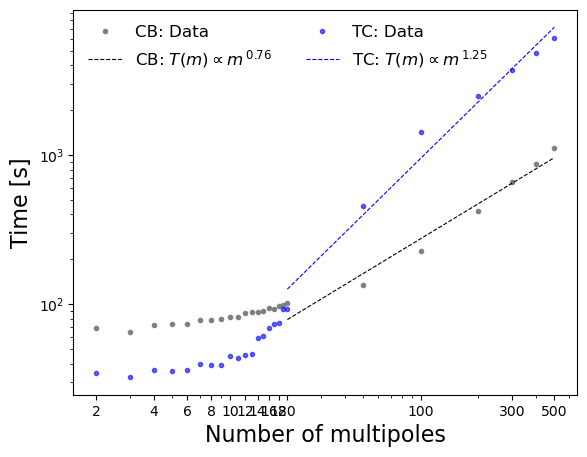

Fitting used only from m>=20. It could be tho that both powers for mcb and mtc are one 'cuz it does not deviate that much.


In [111]:
fls = 16; lw = .8
txts = 12
plt.figure(figsize=(6.5,5))

X = multipoles
YcbData = t_sec
YtcData = t_tc_sec

plt.plot(X,YcbData,marker=".",linestyle="",color="grey",label=f"CB: Data")
plt.plot(Xcb,Ycb_lolog,marker="",linestyle="dashed",color="black",label=r"CB: $T(m) \propto m^{\,0.76}$",lw = lw)


plt.plot(X,YtcData,marker=".",linestyle="",color="blue",label=f"TC: Data",alpha=.6)
plt.plot(Xtc,Ytc_lolog,marker="",linestyle="dashed",color="blue",label=r"TC: $T(m) \propto m^{\,1.25}$",lw = lw)

plt.xscale("log")
plt.yscale("log")

plt.xticks(X[::2],X[::2])
plt.xlabel("Number of multipoles",fontsize=fls)
plt.ylabel("Time [s]",fontsize=fls)

plt.legend(frameon=False,ncol=2,fontsize=txts)


# plt.savefig("images/cballs_tVsm_logy.pdf",bbox_inches="tight", dpi=200)
plt.show()
print("Fitting used only from m>=20. It could be tho that both powers for mcb and mtc are one 'cuz it does not deviate that much.")

In [112]:
time_f = glob.glob("/pscratch/sd/j/joar/makeBenchmark/varyingNp/cballs_5_ftrvaryNp_T17zs9r0NS*/time_T17zs9r0NS*",recursive=True)
time_f.sort()
time_f

['/pscratch/sd/j/joar/makeBenchmark/varyingNp/cballs_5_ftrvaryNp_T17zs9r0NS0256/time_T17zs9r0NS256',
 '/pscratch/sd/j/joar/makeBenchmark/varyingNp/cballs_5_ftrvaryNp_T17zs9r0NS0512/time_T17zs9r0NS512',
 '/pscratch/sd/j/joar/makeBenchmark/varyingNp/cballs_5_ftrvaryNp_T17zs9r0NS1028/time_T17zs9r0NS1028',
 '/pscratch/sd/j/joar/makeBenchmark/varyingNp/cballs_5_ftrvaryNp_T17zs9r0NS2048/time_T17zs9r0NS2048',
 '/pscratch/sd/j/joar/makeBenchmark/varyingNp/cballs_5_ftrvaryNp_T17zs9r0NS4096/time_T17zs9r0NS4096']

In [113]:
tNp_sec = np.zeros(len(time_f))
for i in range(len(time_f)):
    with open(time_f[i],"r") as f:
        if i < 3:
            t = float(f.readline().split(" ")[0].split("=")[1])
        elif i==3:
            t = float(f.readline().split(" ")[0].split("=")[0])
        elif i == 4:
            t = float(f.readline().split(" ")[0].split("=")[1])
        tNp_sec[i] = t

In [114]:
print(*tNp_sec,sep="\n")

2.87
11.95
75.0
424.63
1974.13


In [115]:
import healpy as hp

In [116]:
nsides = np.array([256,512,1024,2048,4096])
nPrtcls = np.array([hp.nside2npix(ns) for ns in nsides])
print(nsides)
print(nPrtcls)

[ 256  512 1024 2048 4096]
[   786432   3145728  12582912  50331648 201326592]


In [117]:
y_minor=[i for i in range(1,10)] + [i for i in range(20,100,10)]+[i for i in range(200,1000,100)]+[2000]

In [118]:
stts_Np = get_lineparams(nPrtcls,tNp_sec)

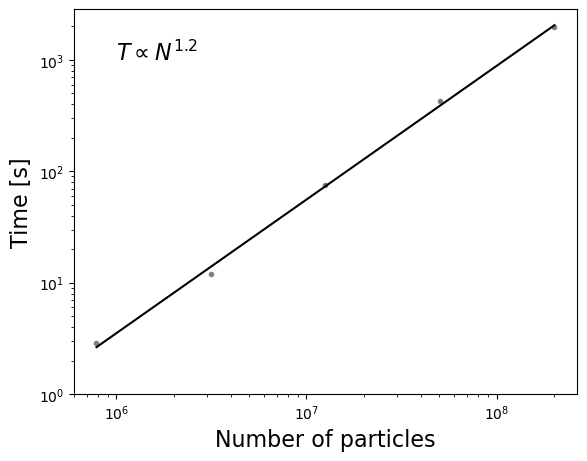

In [119]:
fls = 16
plt.figure(figsize=(6.5,5))
X = nPrtcls.astype("int")
Ydata = tNp_sec
Y = get_loglogline(X,stts_Np[2],stts_Np[3],False)
plt.plot(X,Ydata,marker=".",linestyle="",color="grey")
plt.plot(X,Y,marker="",linestyle="solid",color="black")

# plt.xticks(X[::1],X[::1],minor=False)
plt.minorticks_off()
plt.xscale("log")
plt.yscale("log")

plt.yticks(y_minor,"",minor=True)


plt.xlabel("Number of particles",fontsize=fls)
plt.ylabel("Time [s]",fontsize=fls)
plt.text(1E6,1E3,r"$T\propto N$"+r"$^{\,1.2}$",fontsize=fls)#f"{np.round(stts_Np[2],4)}",fontsize=txts)
# plt.savefig("images/cballs_tVNp.pdf",bbox_inches="tight", dpi=200)
plt.show()

In [41]:
print(f"Time(N) = exp[{np.round(stts_Np[2],4)} ln(N) + {np.round(stts_Np[3],4)}]")

Time(N) = exp[1.2002 ln(N) + -15.3216]


## adding 2pts to it

In [122]:
twoPts_f = glob.glob("/pscratch/sd/j/joar/makeBenchmark/varyingNp/cballs_6_ftrvaryNP_2pts_T17zs9r0NS*/time_T17zs9r0NS*",recursive=True)
twoPts_f.sort()
twoPts_f

['/pscratch/sd/j/joar/makeBenchmark/varyingNp/cballs_6_ftrvaryNP_2pts_T17zs9r0NS0256/time_T17zs9r0NS256',
 '/pscratch/sd/j/joar/makeBenchmark/varyingNp/cballs_6_ftrvaryNP_2pts_T17zs9r0NS0512/time_T17zs9r0NS512',
 '/pscratch/sd/j/joar/makeBenchmark/varyingNp/cballs_6_ftrvaryNP_2pts_T17zs9r0NS1028/time_T17zs9r0NS1028',
 '/pscratch/sd/j/joar/makeBenchmark/varyingNp/cballs_6_ftrvaryNP_2pts_T17zs9r0NS2048/time_T17zs9r0NS2048',
 '/pscratch/sd/j/joar/makeBenchmark/varyingNp/cballs_6_ftrvaryNP_2pts_T17zs9r0NS4096/time_T17zs9r0NS4096']

In [126]:
tcb_2pts = np.zeros(len(twoPts_f))
for i in range(len(twoPts_f)):
    with open(twoPts_f[i],"r") as f:
        tcb_2pts[i] = float(f.readline().split()[0])

In [127]:
print(tcb_2pts)

[   1.81    7.11   53.73  335.39 1567.96]


In [129]:
tcb_2pts_params = get_fclineparams(nPrtcls,tcb_2pts)

In [130]:
tcb_2pts_params

(array([ 7.89594365e-06, -3.02962725e+01]),
 array([  1.25386065, -16.55560109]))

In [133]:
stts_Np[2]

1.2001512433517738

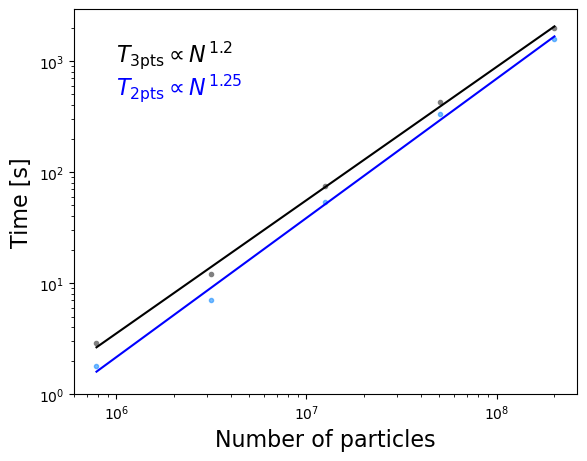

In [136]:
fls = 16
plt.figure(figsize=(6.5,5))
X = nPrtcls.astype("int")
Ydata = tNp_sec
Y = get_loglogline(X,stts_Np[2],stts_Np[3],False)
plt.plot(X,Ydata,marker=".",linestyle="",color="grey")
plt.plot(X,Y,marker="",linestyle="solid",color="black")

plt.plot(X,tcb_2pts,color="dodgerblue",linestyle="",marker=".",alpha=.6)
Y2pts = get_loglogline(nPrtcls,tcb_2pts_params[1][0],tcb_2pts_params[1][1])
plt.plot(X,Y2pts,marker="",linestyle="solid",color="blue")

# plt.xticks(X[::1],X[::1],minor=False)
plt.minorticks_off()
plt.xscale("log")
plt.yscale("log")

plt.yticks(y_minor,"",minor=True)


plt.xlabel("Number of particles",fontsize=fls)
plt.ylabel("Time [s]",fontsize=fls)
plt.text(1E6,1E3,r"$T_{\rm 3pts}\propto N$"+r"$^{\,1.2}$",fontsize=fls,color="black")
plt.text(1E6,5E2,r"$T_{\rm 2pts}\propto N$"+r"$^{\,1.25}$",fontsize=fls,color="blue")
# plt.savefig("images/cballs_tVNp.pdf",bbox_inches="tight", dpi=200)
plt.show()

## adding TC 3- and 2-pts

In [139]:
t_tc_2pts_f = glob.glob("/pscratch/sd/j/joar/makeBenchmark/tc5/varyingNP_2pts/times/time_T17zs9r0NS*")
t_tc_2pts_f.sort()
t_tc_2pts_f

['/pscratch/sd/j/joar/makeBenchmark/tc5/varyingNP_2pts/times/time_T17zs9r0NS0256',
 '/pscratch/sd/j/joar/makeBenchmark/tc5/varyingNP_2pts/times/time_T17zs9r0NS0512',
 '/pscratch/sd/j/joar/makeBenchmark/tc5/varyingNP_2pts/times/time_T17zs9r0NS1028',
 '/pscratch/sd/j/joar/makeBenchmark/tc5/varyingNP_2pts/times/time_T17zs9r0NS2048',
 '/pscratch/sd/j/joar/makeBenchmark/tc5/varyingNP_2pts/times/time_T17zs9r0NS4096']

In [151]:
t_tc_2pts = np.zeros(len(t_tc_2pts_f)-1)
for i in range(len(t_tc_2pts_f)-1):
    with open(t_tc_2pts_f[i],"r") as f:
        #print(f.readline().split()[0])
        t_tc_2pts[i] = float(f.readline().split()[0])
#with open(t_tc_2pts_f[-1],"r") as f:
    #print(f.readlines()[1].split()[0])
    #t_tc_2pts[i] = float(f.readline().split()[0])

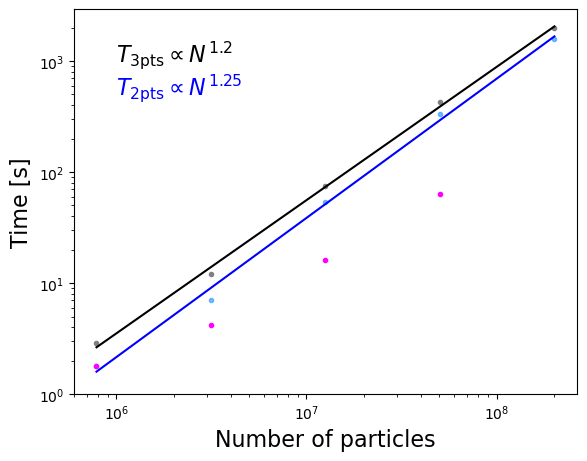

In [154]:
fls = 16
plt.figure(figsize=(6.5,5))
X = nPrtcls.astype("int")
Ydata = tNp_sec
Y = get_loglogline(X,stts_Np[2],stts_Np[3],False)
plt.plot(X,Ydata,marker=".",linestyle="",color="grey")
plt.plot(X,Y,marker="",linestyle="solid",color="black")

plt.plot(X,tcb_2pts,color="dodgerblue",linestyle="",marker=".",alpha=.6)
Y2pts = get_loglogline(nPrtcls,tcb_2pts_params[1][0],tcb_2pts_params[1][1])
plt.plot(X,Y2pts,marker="",linestyle="solid",color="blue")


plt.plot(X[:-1],t_tc_2pts,color="magenta",linestyle="",marker=".")


# plt.xticks(X[::1],X[::1],minor=False)
plt.minorticks_off()
plt.xscale("log")
plt.yscale("log")

plt.yticks(y_minor,"",minor=True)


plt.xlabel("Number of particles",fontsize=fls)
plt.ylabel("Time [s]",fontsize=fls)
plt.text(1E6,1E3,r"$T_{\rm 3pts}\propto N$"+r"$^{\,1.2}$",fontsize=fls,color="black")
plt.text(1E6,5E2,r"$T_{\rm 2pts}\propto N$"+r"$^{\,1.25}$",fontsize=fls,color="blue")
# plt.savefig("images/cballs_tVNp.pdf",bbox_inches="tight", dpi=200)
plt.show()

In [161]:
t_tc_3pts_f = glob.glob("/pscratch/sd/j/joar/makeBenchmark/tc5/varyingNP/times/time_T17zs9r0NS*")
t_tc_3pts_f.sort()
t_tc_3pts_f

['/pscratch/sd/j/joar/makeBenchmark/tc5/varyingNP/times/time_T17zs9r0NS0256',
 '/pscratch/sd/j/joar/makeBenchmark/tc5/varyingNP/times/time_T17zs9r0NS0512',
 '/pscratch/sd/j/joar/makeBenchmark/tc5/varyingNP/times/time_T17zs9r0NS1028',
 '/pscratch/sd/j/joar/makeBenchmark/tc5/varyingNP/times/time_T17zs9r0NS2048',
 '/pscratch/sd/j/joar/makeBenchmark/tc5/varyingNP/times/time_T17zs9r0NS4096']

In [164]:
t_tc_3pts = np.zeros(len(t_tc_3pts_f)-1)
for i in range(len(t_tc_3pts_f)-1):
    with open(t_tc_3pts_f[i],"r") as f:
        #print(f.readline())
        t_tc_3pts[i] = float(f.readline().split()[0])

In [165]:
t_tc_3pts

array([  2.32,   8.32,  41.91, 371.17])

In [170]:
ttc_2pts_params = get_fclineparams(nPrtcls[:-1],t_tc_2pts)
ttc_3pts_params = get_fclineparams(nPrtcls[:-1],t_tc_3pts)

In [175]:
print(ttc_2pts_params[1],ttc_3pts_params[1])

[  0.86829836 -11.3601067 ] [  1.21490368 -15.86585284]


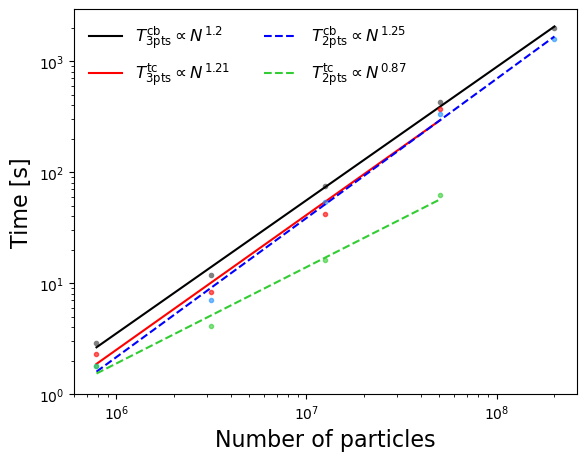

In [192]:
fls = 16
plt.figure(figsize=(6.5,5))
X = nPrtcls.astype("int")
Ydata = tNp_sec
Y = get_loglogline(X,stts_Np[2],stts_Np[3])
plt.plot(X,Ydata,marker=".",linestyle="",color="grey")
plt.plot(X,Y,marker="",linestyle="solid",color="black",label=r"$T^{\rm cb}_{\rm 3pts}\propto N$"+r"$^{\,1.2}$")

plt.plot(X[:-1],t_tc_3pts,color="red",linestyle="",marker=".",alpha=.6)
Y = get_loglogline(X[:-1],ttc_3pts_params[1][0],ttc_3pts_params[1][1])
plt.plot(X[:-1],Y,marker="",linestyle="solid",color="red",label=r"$T^{\rm tc}_{\rm 3pts}\propto N$"+r"$^{\,1.21}$")

plt.plot(X,tcb_2pts,color="dodgerblue",linestyle="",marker=".",alpha=.6)
Y2pts = get_loglogline(X,tcb_2pts_params[1][0],tcb_2pts_params[1][1])
plt.plot(X,Y2pts,marker="",linestyle="dashed",color="blue",label=r"$T^{\rm cb}_{\rm 2pts}\propto N$"+r"$^{\,1.25}$")

plt.plot(X[:-1],t_tc_2pts,color="limegreen",linestyle="",marker=".",alpha=.6)
Y = get_loglogline(X[:-1],ttc_2pts_params[1][0],ttc_2pts_params[1][1])
plt.plot(X[:-1],Y,marker="",linestyle="dashed",color="limegreen",label=r"$T^{\rm tc}_{\rm 2pts}\propto N$"+r"$^{\,0.87}$")

# plt.xticks(X[::1],X[::1],minor=False)
plt.minorticks_off()
plt.xscale("log")
plt.yscale("log")

plt.yticks(y_minor,"",minor=True)


plt.xlabel("Number of particles",fontsize=fls)
plt.ylabel("Time [s]",fontsize=fls)
# plt.text(1E6,1E3,r"$T_{\rm 3pts}\propto N$"+r"$^{\,1.2}$",fontsize=fls,color="black")
# plt.text(1E6,5E2,r"$T_{\rm 2pts}\propto N$"+r"$^{\,1.25}$",fontsize=fls,color="blue")
# plt.text(1E6,2.5E2,r"$T_{\rm 3pts}\propto N$"+r"$^{\,1.21}$",fontsize=fls,color="purple")
# plt.text(1E6,1.3E2,r"$T_{\rm 2pts}\propto N$"+r"$^{\,0.87}$",fontsize=fls,color="magenta")
plt.legend(frameon=False,fontsize=txts,ncol=2)
# plt.savefig("images/cballsAndTC_tVNp_2And3Pts.pdf",bbox_inches="tight", dpi=200)
plt.show()

# T Vs Np
Time performance versus number of particles

## Load CBalls files

In [20]:
# load files containing time for each run of the code with different number of particles (pixels) --- this is the time for 2 point corr function and 3 point corr function

cb2_f = glob.glob("/pscratch/sd/j/joar/makeBenchmark/varyingNp/cballs_6_ftrvaryNP_2pts_interactive_T17zs9r0NS*/time_T17zs9r0NS*",recursive=True)
cb2_f.sort()
cb3_f = glob.glob("/pscratch/sd/j/joar/makeBenchmark/varyingNp/cballs_5_ftrvaryNp_interactive_T17zs9r0NS*/time_T17zs9r0NS*",recursive=True)
cb3_f.sort()

In [21]:
# read wall and user times for cballs

ndata = len(cb3_f)
tcb_2 = np.zeros((2,ndata)) # wall time [0] and user time [1]
tcb_3 = tcb_2.copy()

for i in range(ndata):
    with open(cb3_f[i],"r") as f:
        line = f.readline()
        tcb_3[0][i] = float(line.split()[0])
        tcb_3[1][i] = float(line.split()[1])
    with open(cb2_f[i],"r") as f:
        line = f.readline()
        tcb_2[0][i] = float(line.split()[0])
        tcb_2[1][i] = float(line.split()[1])

## Load Treecorr files

In [22]:
# load files containing time for each run of the code with different number of particles (pixels) --- this is the time for 2 point corr function and 3 point corr function

tc2_f = glob.glob("/pscratch/sd/j/joar/makeBenchmark/tc5/varyingNP_2pts_interactive/times/time_T17zs9r0NS*")
tc2_f.sort()
tc3_f = glob.glob("/pscratch/sd/j/joar/makeBenchmark/tc5/varyingNP_interactive/times/time_T17zs9r0NS*")
tc3_f.sort()

In [23]:
# read wall and user times for tc

ttc_2 = np.zeros((2,ndata)) # wall time [0] and user time [1]
ttc_3 = ttc_2.copy()

for i in range(ndata):
    with open(tc3_f[i],"r") as f:
        line = f.readline()
        ttc_3[0][i] = float(line.split()[0])
        ttc_3[1][i] = float(line.split()[1])
    with open(tc2_f[i],"r") as f:
        line = f.readline()
        ttc_2[0][i] = float(line.split()[0])
        ttc_2[1][i] = float(line.split()[1])

## Do plots for CBalls and Treecorrs times

In [24]:
# the number of particles (pixels) are given by the nside parameter of healpix

import healpy as hp

In [25]:
# get the number of particles for each run

nsides = [256,512,1024,2048,4096]
nParticles = np.array([hp.nside2npix(n) for n in nsides],dtype="int")

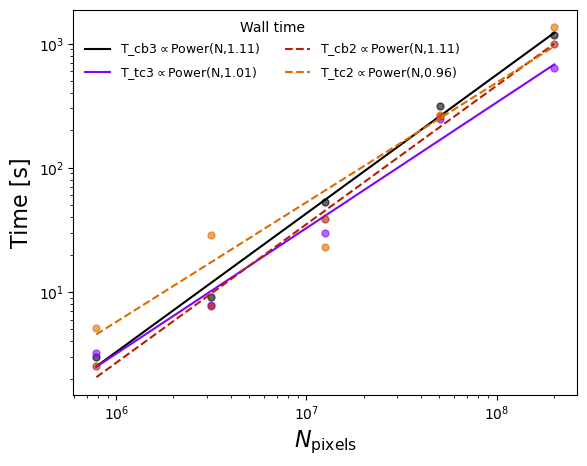

In [27]:
# do a plot for User time or Wall time of the runs

txts=9; lfs = 16; ms = 10
plt.figure(figsize=(6.5,5))

X = nParticles
data = [tcb_3,ttc_3,tcb_2,ttc_2]
dataNames = "cb3 tc3 cb2 tc2".split()
tt = {"Wall time":0,"User time":1}; ttr = dict(map(reversed, tt.items())) # time type
colors = get_mycmapping(plt.get_cmap("gnuplot"),len(data))

# select Wall time or User time
s = tt["Wall time"] 
for i,d in enumerate(data):
    t = d[s]
    params = get_fclineparams(X,t)
    Y = get_loglogline(X,params[1][0],params[1][1])
    plt.plot(X,t,linestyle="",marker=".",markersize=ms,color=colors[i],alpha=.6)
    ls = "solid" if i<2 else "dashed"
    plt.plot(X,Y,linestyle=ls,color=colors[i],label=f"T_{dataNames[i]}"+r"$\propto$" + f"Power(N,{cutoff(params[1][0])})")
    
plt.xscale("log"); plt.yscale("log")
plt.legend(frameon=False,fontsize=txts,ncol=2,title=ttr[s])

plt.xlabel(r"$N_{\rm pixels}$",fontsize=lfs)
plt.ylabel(r"Time [s]",fontsize=lfs)

# plt.savefig(f"images/{ttr[s].split()[0]+ttr[s].split()[1]}_CBTC_2And3Pts_Ng.pdf",bbox_inches="tight",dpi=200)
plt.show()

In [29]:
# We are interested in plot the time it takes CBalls to get the first 20 multipoles, so we stay with m <= 20 in multipoles array

stts_m = get_lineparams(multipoles[:19],t_sec[:19])
print(f"Slope and y-intercept for the line fitting T(m) with m <= 20 are m = {stts_m[0]} and T0 = {stts_m[1]}")

Slope and y-intercept for the line fitting T(m) with m <= 20 are m = 1.8529824561403507 and T0 = 63.660350877193


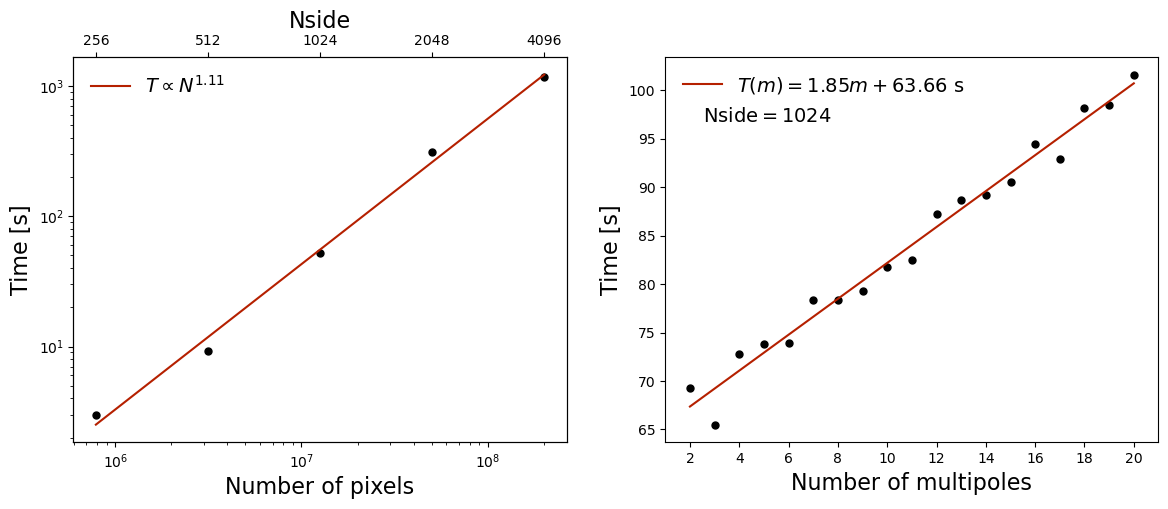

In [31]:
# do a figure with the plots of T-Vs-Np and T-Vs-m only containing CBalls times

txts=14; lfs = 16; ms = 10
fig, ax = plt.subplots(1, 2,figsize=(14,5))

ic=2
pc = "black"

ax2 = ax[0].twiny()
ax2.set_xscale("log")
ax2.set_xticks(nParticles,nsides)
ax2.set_xlabel('Nside',fontsize=lfs)
ax2.minorticks_off()

ax[0].plot(X,tcb_3[0],linestyle="",marker=".",markersize=ms,color=pc)
params = get_fclineparams(X,tcb_3[0])
Y = get_loglogline(X,params[1][0],params[1][1])
ax[0].plot(X,Y,linestyle="solid",color=colors[ic],label=r"$T\propto N^{1.11}$")
ax[0].set_xscale("log"); ax[0].set_yscale("log")

ax2.plot(nParticles,[100,100,100,100,100],linestyle="",marker="") # this serves to plot the twin axis of ax[0]

ax[0].legend(frameon=False,fontsize=txts,loc="upper left")
ax[0].set_xlabel(r"Number of pixels",fontsize=lfs)
ax[0].set_ylabel(r"Time [s]",fontsize=lfs)


Xm = multipoles[:19].astype("int")
Ydata = t_sec[:19]
Y = stts_m[0]*multipoles[:19] + stts_m[1]
ax[1].plot(Xm.astype("int"),Ydata,marker=".",linestyle="",color=pc,markersize=ms)
ax[1].plot(Xm.astype("int"),Y,marker="",linestyle="solid",color=colors[ic],label=r"$T(m) = 1.85 m + 63.66$ s")
ax[1].set_xticks(Xm[::2],Xm[::2])
ax[1].set_xlim(1,21)
ax[1].legend(frameon=False,fontsize=txts,ncol=1)

ax[1].set_xlabel(r"Number of multipoles",fontsize=lfs)
ax[1].set_ylabel(r"Time [s]",fontsize=lfs)
fig.text(.575,.75,r"${\rm Nside}=1024$",fontsize=txts)


# plt.savefig("images/t_Vs_NpixNm.pdf",bbox_inches="tight",dpi=200)
plt.show()